# FilmTV movies dataset

**Context**

Movies data are available on IMDb and many other websites with average votes, vote numbers, reviews and descriptions. While IMDb is the most trustworthy source for data, other websites as FilmTV.it can provide the information on how users from different countries rate the movies compared to each other.

**Content**

Each row represents a movie available on FilmTV.it, with the original title, year, genre, duration, country, director, actors, average vote and votes.
The fie in the English version contains 40,047 movies and 19 attributes, while the Italian version contains one extra-attribute for the local title used when the movie was published in Italy.

In [1]:
import pandas as pd

In [2]:
film_df = pd.read_csv('filmtv_movies - ENG.csv')
film_df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [3]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  description   38848 non-null  object 
 13  notes         18456 non-null  object 
 14  humor         40303 non-null  int64  
 15  rhythm        40303 non-null  int64  
 16  effort        40303 non-null  int64  
 17  tension       40303 non-null  int64  
 18  erotism       40303 non-nu

In [4]:
# Drop columns that are not needed
film_df.drop(['notes', 'rhythm', 'effort', 'tension', 'erotism'], axis=1, inplace=True)

In [5]:
# Count null values
film_df.isnull().sum()

filmtv_id          0
title              0
year               0
genre             95
duration           0
country           11
directors         33
actors          2052
avg_vote           0
critics_vote    4600
public_vote      474
total_votes        0
description     1455
humor              0
dtype: int64

In [6]:
# drop null values 
film_df = film_df.dropna(subset=['genre'])
film_df = film_df.dropna(subset=['country'])

## Plots

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Word clouds

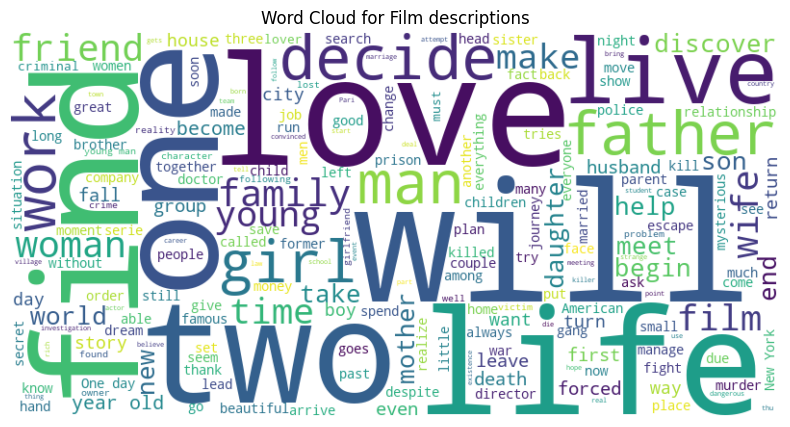

In [8]:
film_df['description'] = film_df['description'].astype(str)
description_column = film_df['description']
# Combine all the descriptions into a single string
all_descriptions = ' '.join(description_column)
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from all Film descriptions")
plt.show()


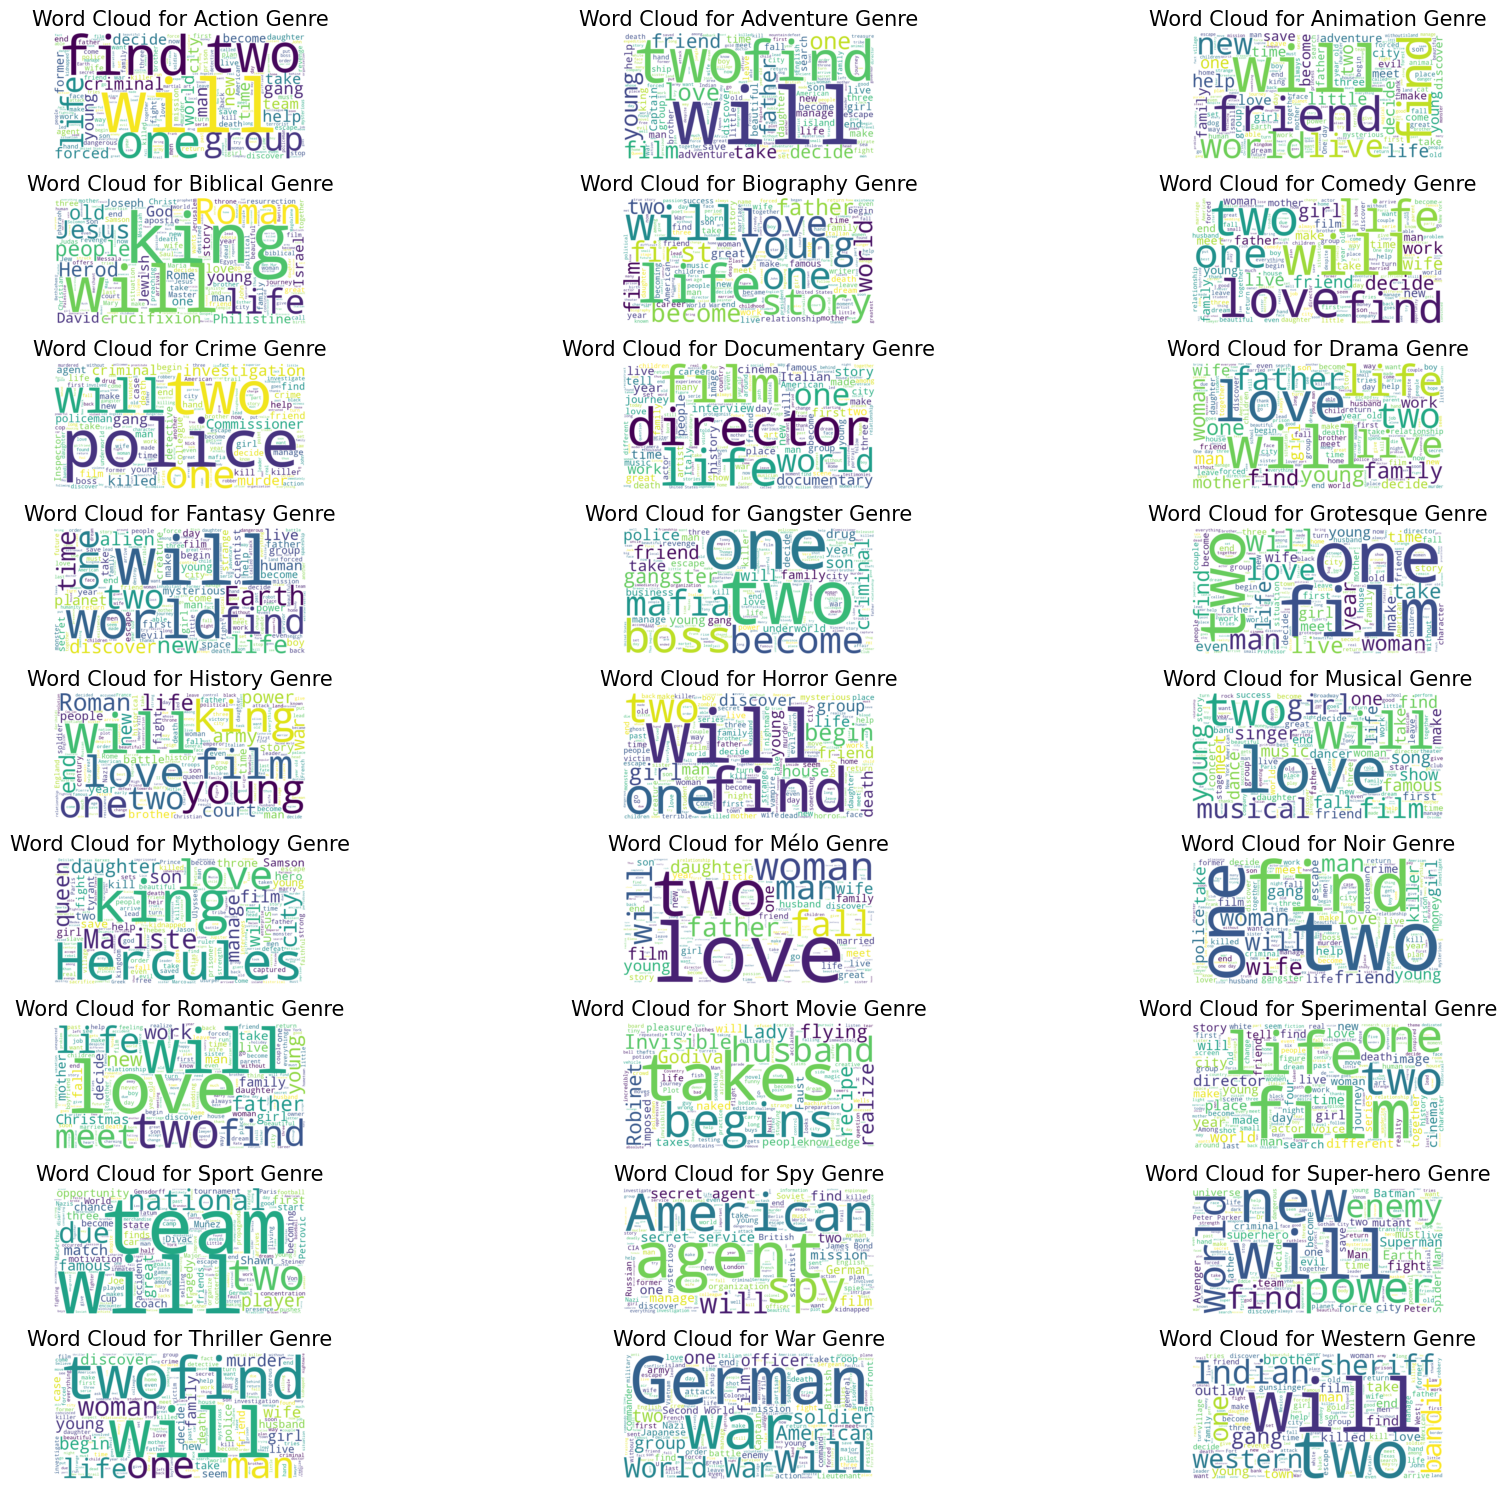

In [23]:
# Group the DataFrame by genre
grouped_by_genre = film_df.groupby('genre')

num_plots = len(grouped_by_genre)
num_cols, num_rows = 3, 9
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axs = axs.flatten()

# Loop through each genre group and plot the word cloud
for i, (genre, group_df) in enumerate(grouped_by_genre):
    all_descriptions = ' '.join(group_df['description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

    # Display the word cloud in the current subplot
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(f"Word Cloud for {genre} Films", fontsize=15)

# Hide any remaining empty subplots
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axs[i])

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
from bubbly.bubbly import bubbleplot

In [ ]:
# Group the filtered DataFrame by year, country, and genre, and count the number of films
film_count = film_df.groupby(['year', 'country', 'genre']).size().reset_index(name='count')

top_country = film_count.groupby('country')['count'].sum().idxmax()
# Filter the data for the top country
film_count_top_country = film_count[(film_count['country'] == top_country)]

In [ ]:
# Create the bar chart using Plotly Express
fig = px.bar(film_count_top_country, x='year', y='count', color='genre',labels={'count': 'Number of Films'},
        title=f'Number of Films per Year in {top_country}')
# Customize the layout
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Films', xaxis=dict(type='category'),  # Use categorical x-axis for years
        showlegend=True, legend_title='Genre', height=600)
fig.show()

In [ ]:
# Focus on the years 2000-2022
filtered_df = film_df[(film_df['year'] >= 2000) & (film_df['year'] <= 2022)]
film_count = filtered_df.groupby(['year', 'country', 'genre']).size().reset_index(name='count')
top_country = film_count.groupby('country')['count'].sum().idxmax()
film_count_top_country = film_count[(film_count['country'] == top_country)]

fig = px.bar(film_count_top_country, x='year', y='count', color='genre', labels={'count': 'Number of Films'},
 title=f'Number of Films per Year in {top_country} - 2000 to 2022')
fig.update_layout( xaxis_title='Year', yaxis_title='Number of Films', xaxis=dict(type='category'),  # Use categorical x-axis for years
 showlegend=True, legend_title='Genre', height=600)
fig.show()

## Movies per decade

In [ ]:
# Create a new column for the decade
film_df['decade'] = (film_df['year'] // 10) * 10
# Group the DataFrame by decade and count the number of movies
movies_per_decade = film_df.groupby(['decade', 'genre']).size().reset_index(name='count')


In [ ]:
fig = px.bar(movies_per_decade, x='decade', y='count', color='genre', labels={'count': 'Number of Movies'},title='Number of Movies by decade - color by genre')
fig.update_layout(xaxis_title='Decade', yaxis_title='Number of Movies', xaxis=dict(type='category'),  # Use categorical x-axis for decades
showlegend=False, height=600)
fig.show()

## Films by country

In [ ]:
# Group the DataFrame by year, country, and count the number of films
films_by_year_country = film_df.groupby(['year', 'country']).size().reset_index(name='count')

# Create an animated choropleth map using Plotly Express
fig = px.choropleth( films_by_year_country, locations='country', locationmode='country names', color='count', hover_name='country',
    color_continuous_scale= px.colors.sequential.PuRd, labels={'count': 'Number of Films'}, title='Number of Films by Country', animation_frame='year')

fig.update_layout(geo=dict(showcoastlines=True), height=600)

fig.show()

## Genre by country

In [ ]:
import plotly.graph_objects as go

top_countries = film_df['country'].value_counts().head(10).index

# Define the number of top genres to consider
top_genre_count = 10

# Create pie charts for each of the top countries and their top 10 genres
for country in top_countries:
    country_df = film_df[film_df['country'] == country]
    
    # Calculate the distribution of the top 10 genres for the current country
    top_genres = country_df['genre'].value_counts().head(top_genre_count)
    
    fig = go.Figure(data=[go.Pie(labels=top_genres.index, values=top_genres.values)])
    
    fig.update_layout(
        title=f'Top {top_genre_count} Genres in {country}',
        showlegend=True,
    )
    fig.show()
